This data cleaning project was sourced from https://www.preppindata.com/challenges. The breakdown of information is as follows.

January 11, 2023
Challenge By: Jenny Martin

For week 2 of our beginner month, Data Source Bank has a requirement to construct International Bank Account Numbers (IBANs), even for Transactions taking place in the UK. We have all the information in separate fields, we just need to put it altogether in the following order:
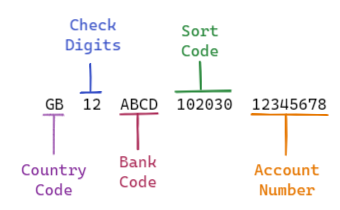
# Inputs
    A list of the transactions, with information about the receiving bank account 
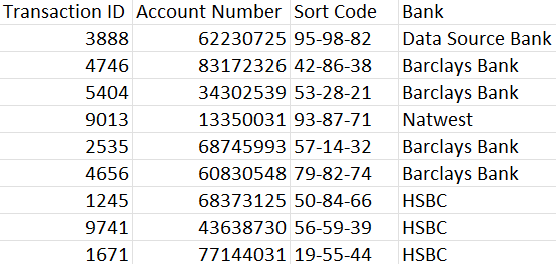

    A lookup table for the SWIFT Bank Codes 
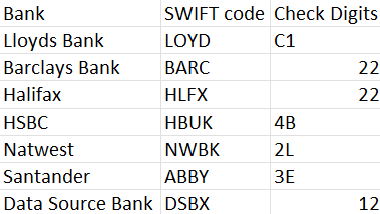
# Requirements: Input data

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data_T = pd.read_csv('Transactions.csv')

data_T

,Transaction ID,Account Number,Sort Code,Bank
0,3888,62230725,95-98-82,Data Source Bank
1,4746,83172326,42-86-38,Barclays Bank
2,5404,34302539,53-28-21,Barclays Bank
3,9013,13350031,93-87-71,Natwest
4,2535,68745993,57-14-32,Barclays Bank
...,...,...,...,...
95,9373,44568613,24-15-12,HSBC
96,2021,72261023,59-17-51,Lloyds Bank
97,6764,10570182,29-72-39,Data Source Bank
98,3286,47326725,21-85-30,Halifax


In [47]:
#data_T = data_T.rename(columns={'Transaction ID': 'Transaction-ID','Account Number':'Account-Number' ,'Sort Code': 'SortCode'})
data_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  100 non-null    int64 
 1   Account Number  100 non-null    int64 
 2   Sort Code       100 non-null    object
 3   Bank            100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


# In the Transactions table, there is a Sort Code field which contains dashes. We need to remove these so just have a 6 digit string (hint)

In [48]:
data_T['Sort Code'] = data_T['Sort Code'].str.replace('-','')
data_T

,Transaction ID,Account Number,Sort Code,Bank
0,3888,62230725,959882,Data Source Bank
1,4746,83172326,428638,Barclays Bank
2,5404,34302539,532821,Barclays Bank
3,9013,13350031,938771,Natwest
4,2535,68745993,571432,Barclays Bank
...,...,...,...,...
95,9373,44568613,241512,HSBC
96,2021,72261023,591751,Lloyds Bank
97,6764,10570182,297239,Data Source Bank
98,3286,47326725,218530,Halifax


# Use the SWIFT Bank Code lookup table to bring in additional information about the SWIFT code and Check Digits of the receiving bank account

In [53]:
data_S = pd.read_csv('Swift Codes.csv')
data_S

,Bank,SWIFT code,Check Digits
0,Lloyds Bank,LOYD,C1
1,Barclays Bank,BARC,22
2,Halifax,HLFX,22
3,HSBC,HBUK,4B
4,Natwest,NWBK,2L
5,Santander,ABBY,3E
6,Data Source Bank,DSBX,12


# Add a field for the Country Code 

In [70]:
data_T['Country Code'] = "GB"
data_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  100 non-null    int64 
 1   Account Number  100 non-null    object
 2   Sort Code       100 non-null    object
 3   Bank            100 non-null    object
 4   Country Code    100 non-null    object
 5   IBAN            100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


# Create the IBAN as above

In [72]:
data_T['Account Number']= data_T['Account Number'].astype(str)
data_T['Sort Code']= data_T['Sort Code'].astype(str)
#data_T['IBAN'] = data_T['Country Code'].str.extract(r'([A-Z0-9]+)', expand=True), data_T['Sort Code'].str.extract(r'([A-Z0-9]+)', expand=True), data_T['Account Number'].str.extract(r'([A-Z0-9]+)', expand=True)
iban1= data_T['Country Code'].str.extract(r'([A-Z0-9]+)', expand=True)
iban2= data_T['Sort Code'].str.extract(r'([A-Z0-9]+)', expand=True)
iban3= data_T['Account Number'].str.extract(r'([A-Z0-9]+)', expand=True)
data_T['IBAN'] = iban1+iban2+iban3
data_T

,Transaction ID,Account Number,Sort Code,Bank,Country Code,IBAN
0,3888,62230725,959882,Data Source Bank,GB,GB95988262230725
1,4746,83172326,428638,Barclays Bank,GB,GB42863883172326
2,5404,34302539,532821,Barclays Bank,GB,GB53282134302539
3,9013,13350031,938771,Natwest,GB,GB93877113350031
4,2535,68745993,571432,Barclays Bank,GB,GB57143268745993
...,...,...,...,...,...,...
95,9373,44568613,241512,HSBC,GB,GB24151244568613
96,2021,72261023,591751,Lloyds Bank,GB,GB59175172261023
97,6764,10570182,297239,Data Source Bank,GB,GB29723910570182
98,3286,47326725,218530,Halifax,GB,GB21853047326725


# Remove unnecessary fields

In [73]:
df = data_T.drop(columns=['Account Number','Sort Code','Bank','Country Code'])
df

,Transaction ID,IBAN
0,3888,GB95988262230725
1,4746,GB42863883172326
2,5404,GB53282134302539
3,9013,GB93877113350031
4,2535,GB57143268745993
...,...,...
95,9373,GB24151244568613
96,2021,GB59175172261023
97,6764,GB29723910570182
98,3286,GB21853047326725
